In [6]:
library(patchwork)
library(tidyverse)

source("../../evaluation_utils/plots/eda_plots.R")
source("../../evaluation_utils/filtering/filtering_normalization.R")


In [7]:
create_plots <- function(pg_matrix, metadata, name, plot_file_prefix, shape_col="Pool", width=14, log_transform=FALSE){

    # if not log transformed, log transform
    if (!log_transform){
        pg_matrix <- log2(pg_matrix + 1)
    }

    # plots
    plot_pca <- pca_plot(pg_matrix, metadata, 
        title=paste0(name, " PCA"), 
        quantitative_col_name='file', col_col='condition', shape_col=shape_col)
    plot_boxplot <- boxplot_pg(pg_matrix, metadata, 
        title=paste0(name, " Boxplot"), 
        color_col='condition', quantitativeColumnName='file')
    plot_density <- plotIntensityDensityByPool(pg_matrix, metadata, 
        title=paste0(name, " Density"), 
        poolColumnName='condition', 
        quantitativeColumnName='file')
    plot_heatmap <- heatmap_plot(pg_matrix, metadata, name, lab=shape_col)

    layout <- (plot_density | plot_pca) /
            (plot_boxplot | plot_heatmap)
    # save plot
    ggsave(file = paste0(plot_file_prefix, "_plots.svg"), plot = layout, width = width, height = 10)
}


Data loaded, for dataset:  01_smaller_lib_balanced_PG_MajorPG  and lab:  Center1 
Data shape:  491 22 
Filtering out features that have NAs in all columns
	Before filtering: 491 22 
	After filtering: 490 22 
Filtering by condition - two not-NA per condition
	Before filtering: 490 22 
	After filtering: 490 22 


No id variables; using all as measure variables

Warning message:
“Removed 402 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 402 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 402 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



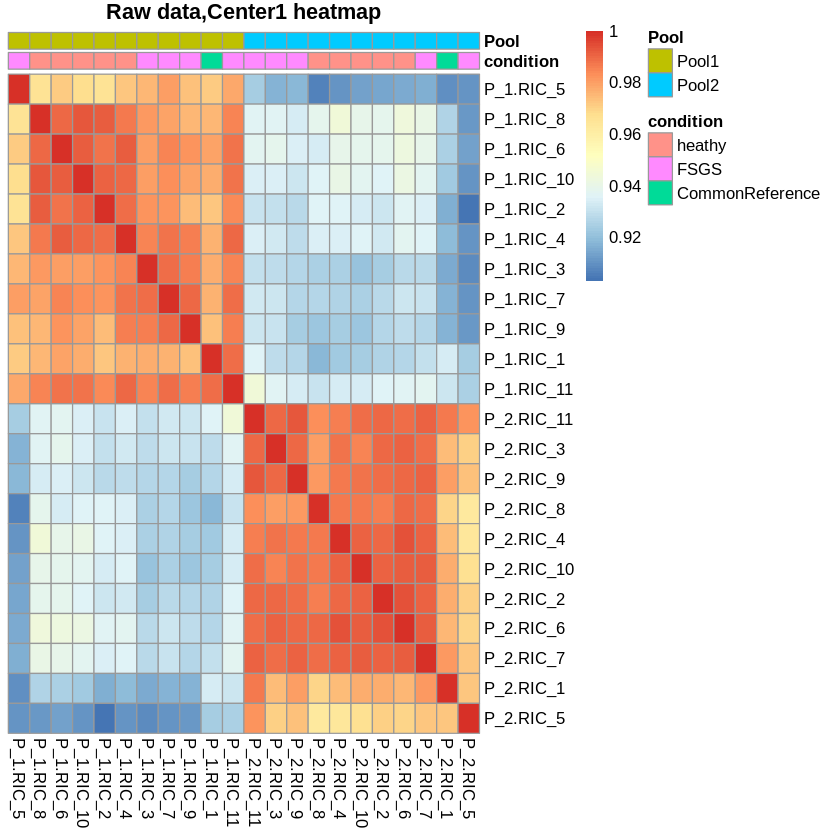

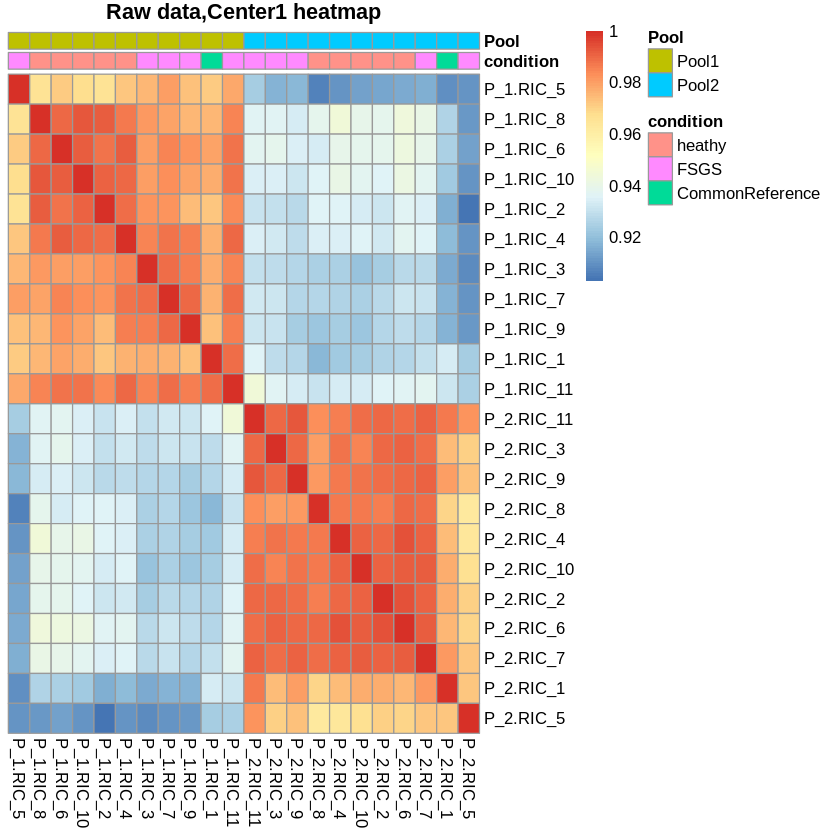

Warning message:
“Removed 402 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 402 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 402 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



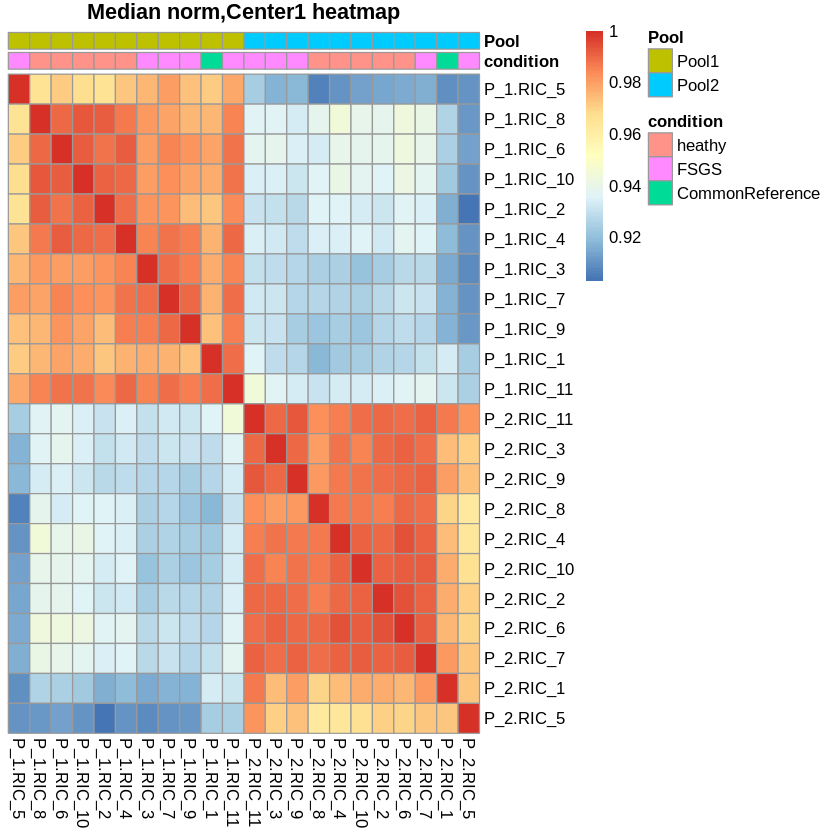

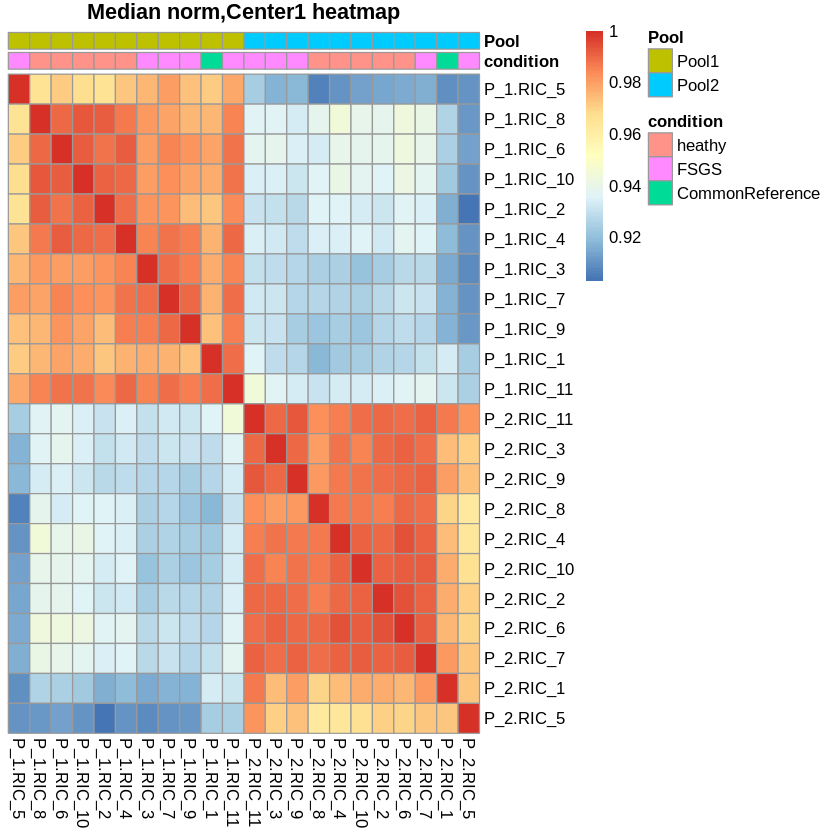

Warning message:
“Removed 438 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 438 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 438 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



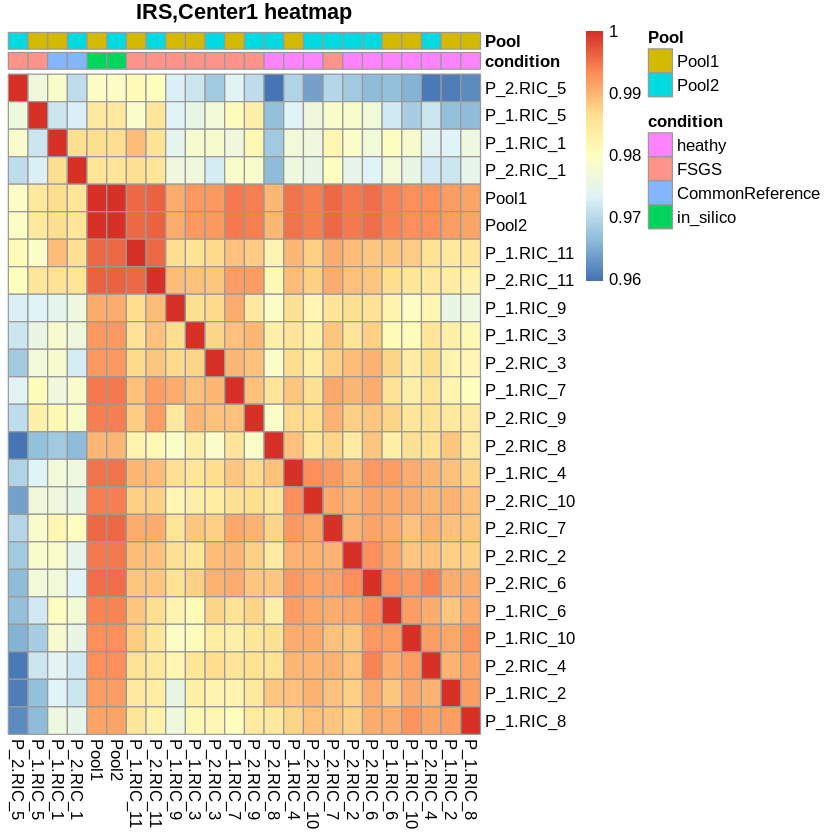

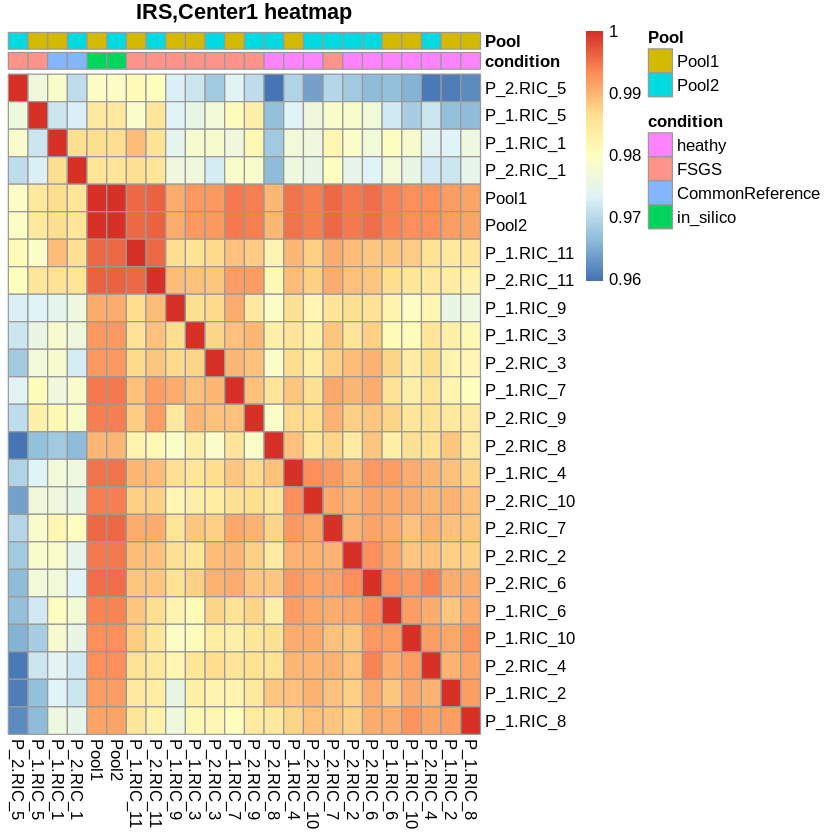

Warning message:
“Removed 365 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 365 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 365 rows containing non-finite values (`stat_summary()`).”


Data loaded, for dataset:  01_smaller_lib_balanced_PG_MajorPG  and lab:  Center2 
Data shape:  516 21 
Filtering out features that have NAs in all columns
	Before filtering: 516 21 
	After filtering: 508 21 
Filtering by condition - two not-NA per condition
	Before filtering: 508 21 
	After filtering: 508 21 


No id variables; using all as measure variables



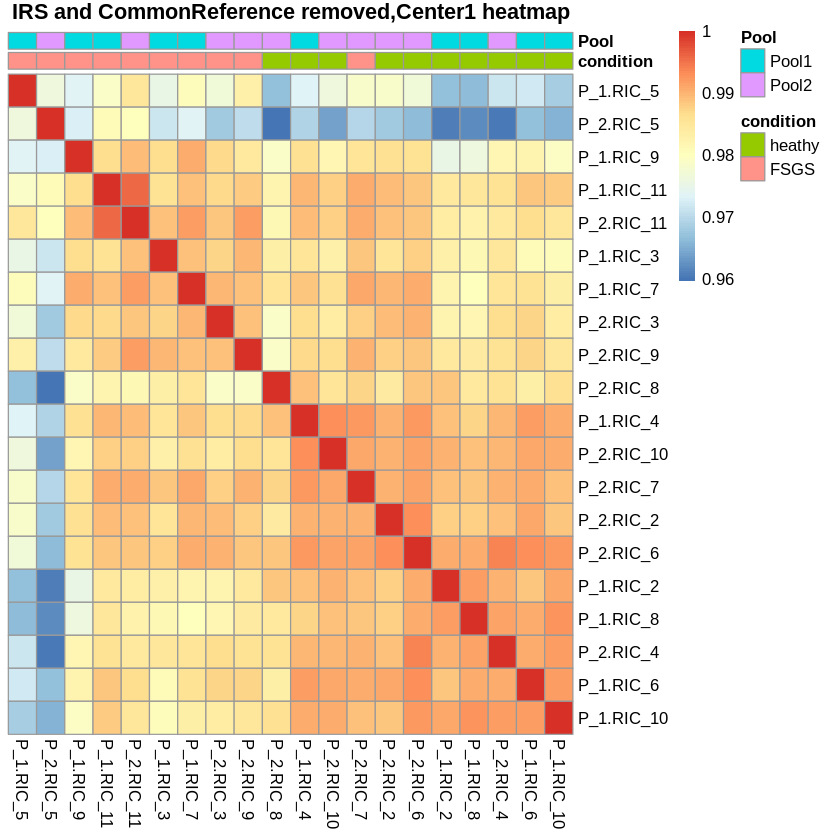

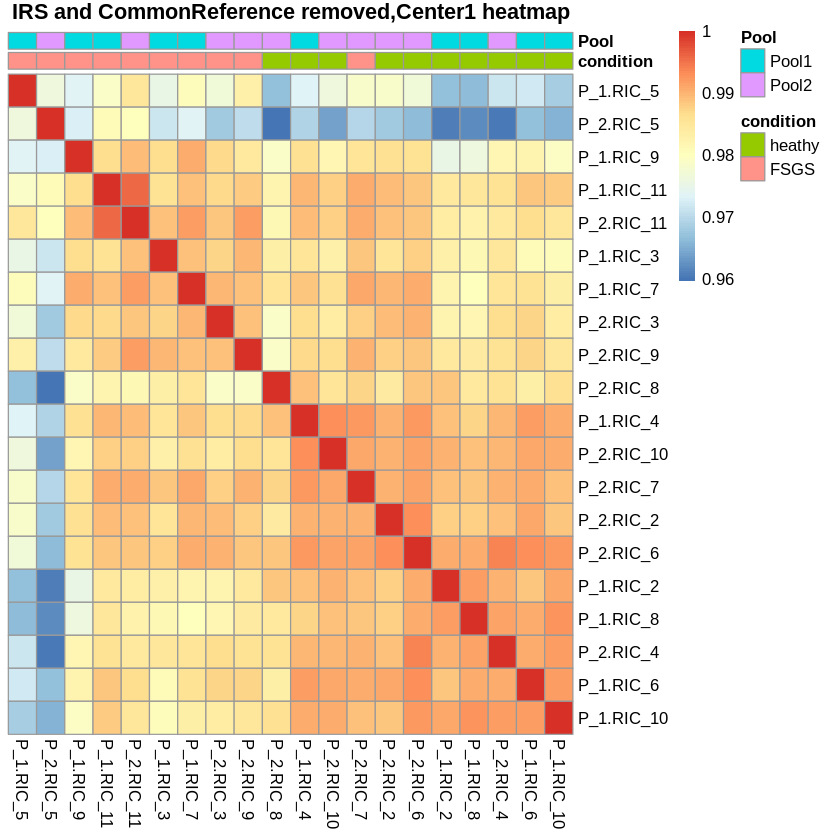

Warning message:
“Removed 613 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 613 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 613 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



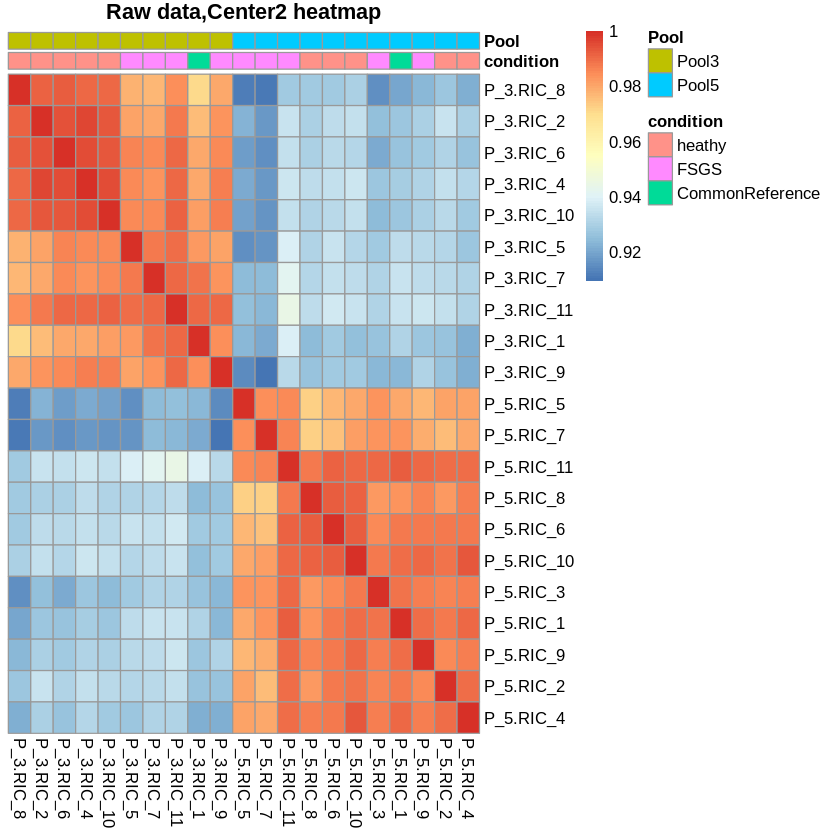

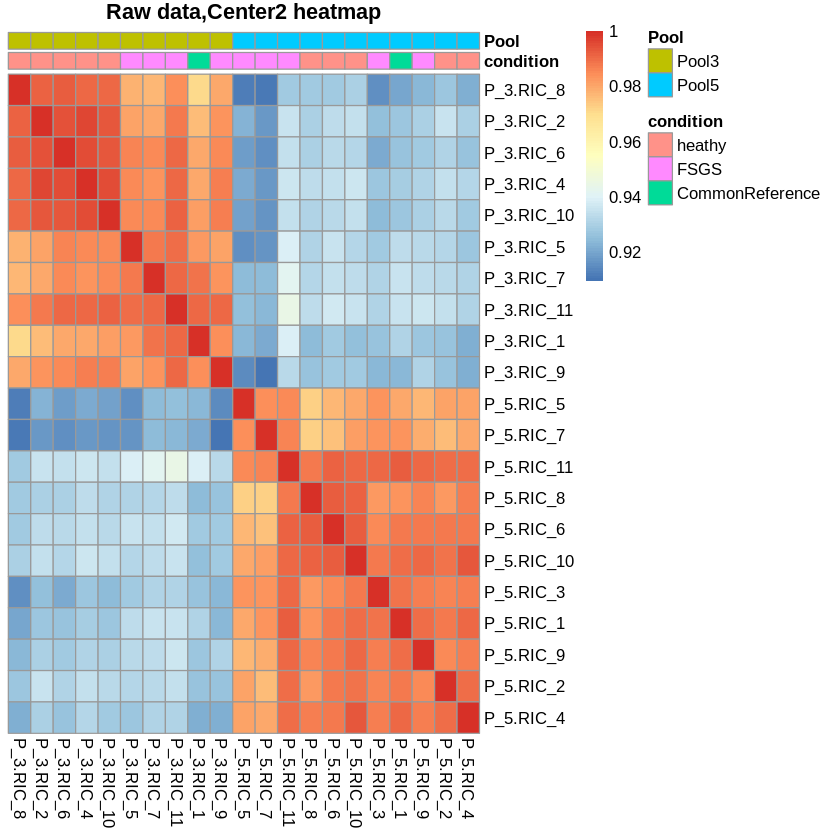

Warning message:
“Removed 613 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 613 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 613 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



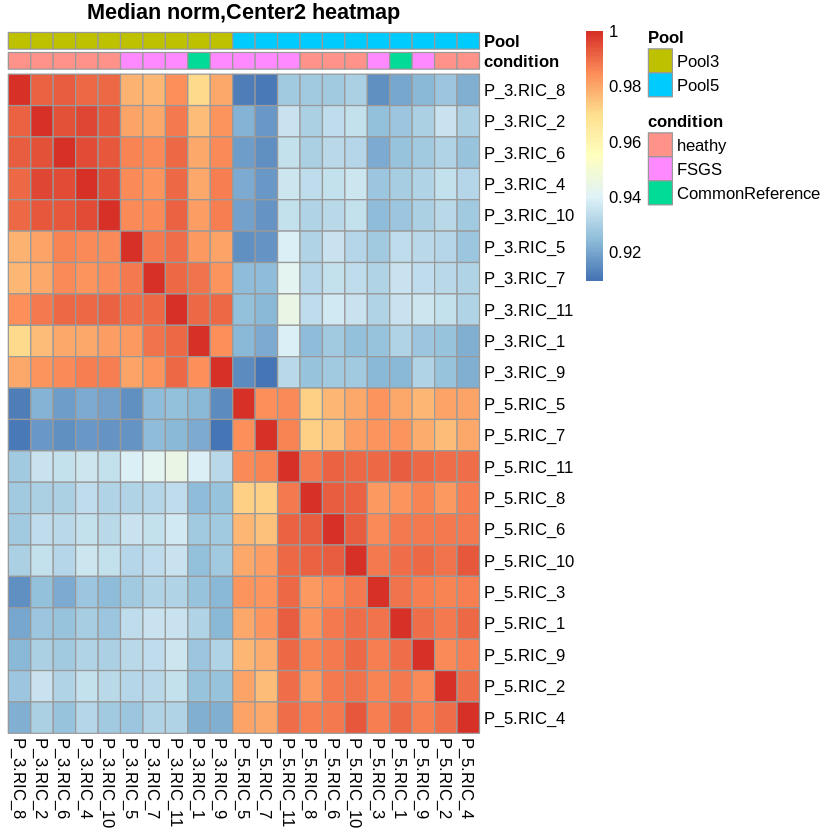

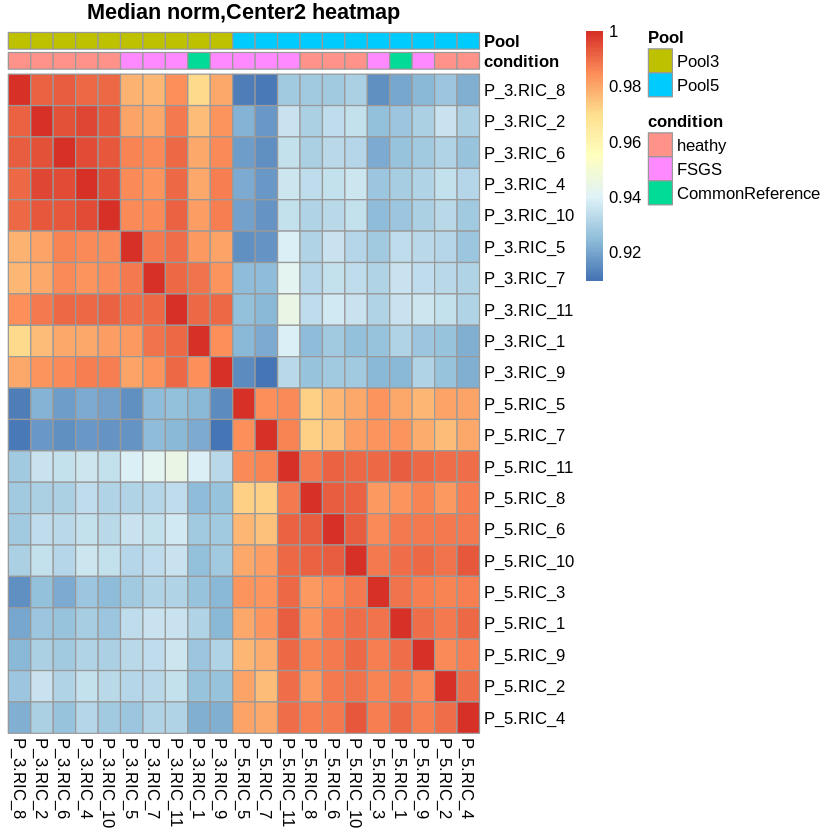

Warning message:
“Removed 673 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 673 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 673 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



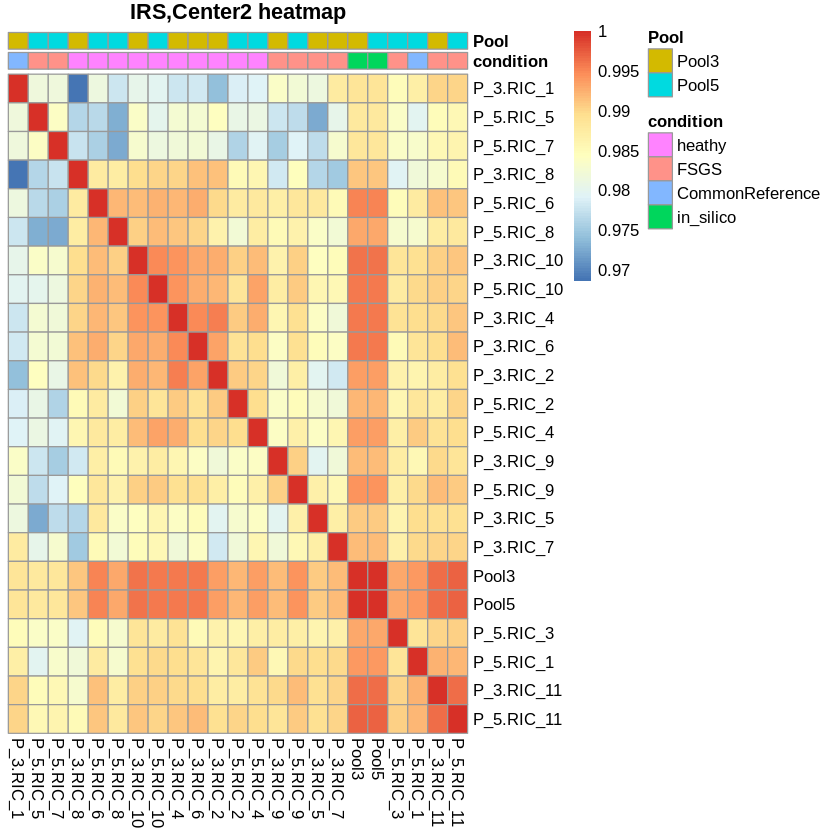

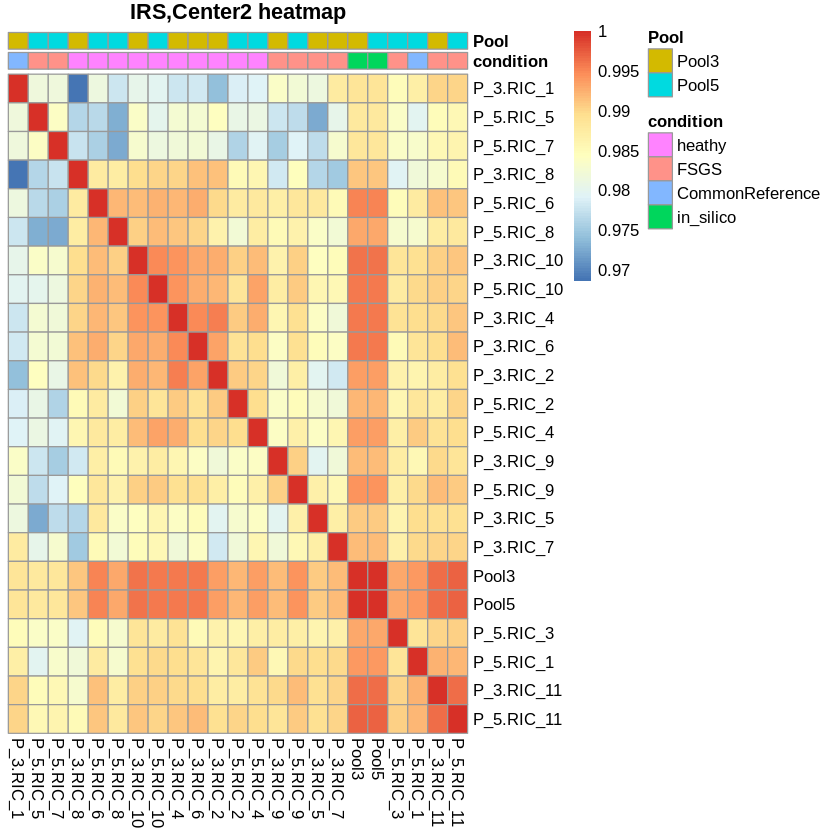

Warning message:
“Removed 553 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 553 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 553 rows containing non-finite values (`stat_summary()`).”


Data loaded, for dataset:  01_smaller_lib_balanced_PG_MajorPG  and lab:  Center3 
Data shape:  438 22 
Filtering out features that have NAs in all columns
	Before filtering: 438 22 
	After filtering: 425 22 
Filtering by condition - two not-NA per condition
	Before filtering: 425 22 
	After filtering: 425 22 


No id variables; using all as measure variables



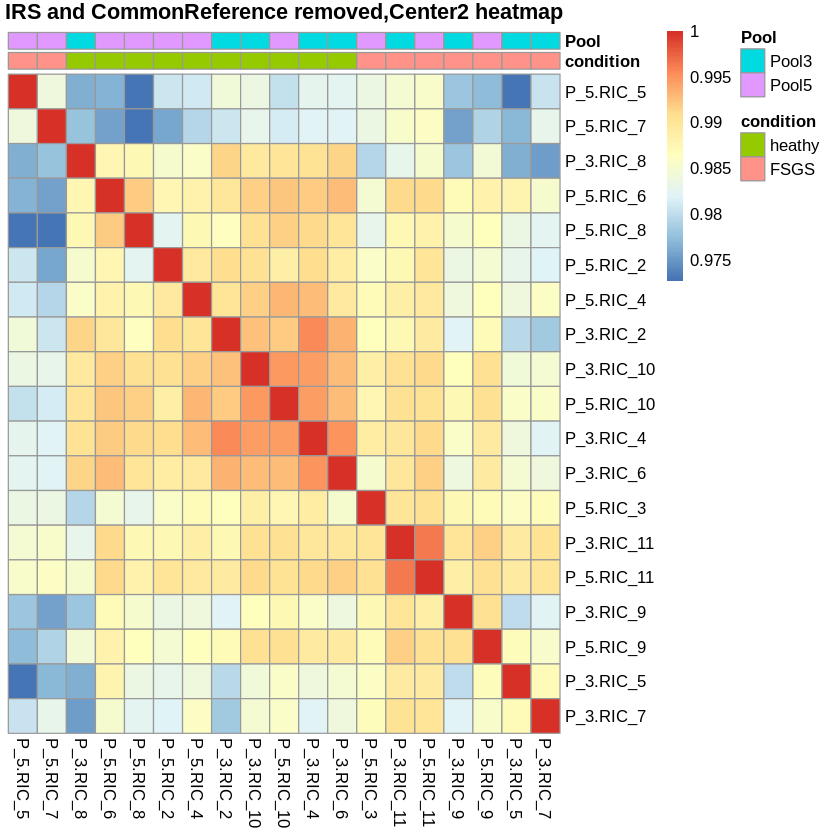

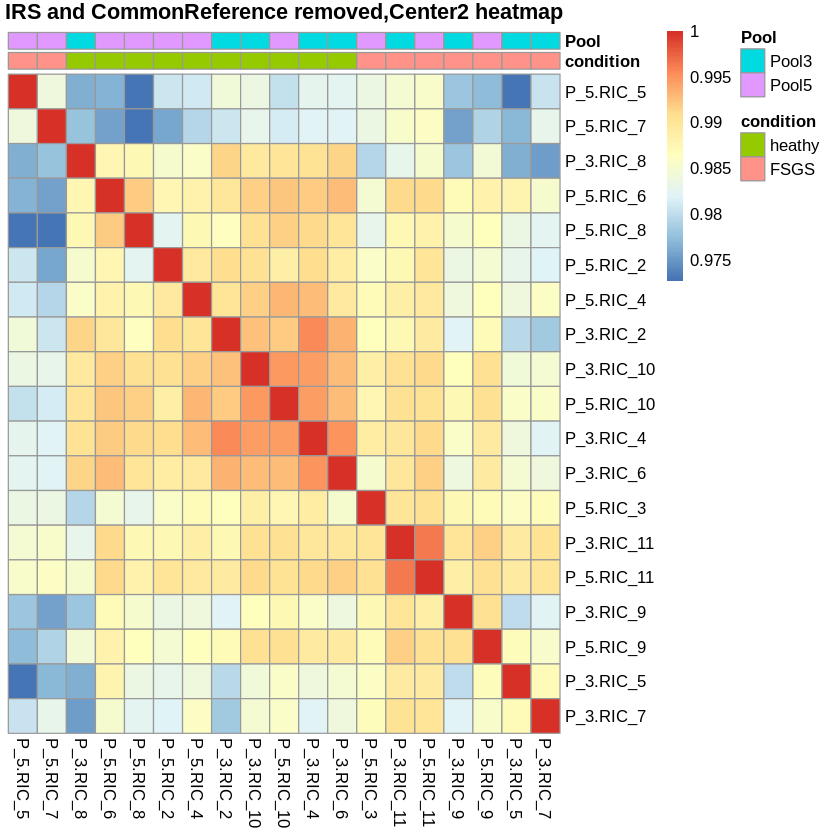

Warning message:
“Removed 525 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 525 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 525 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



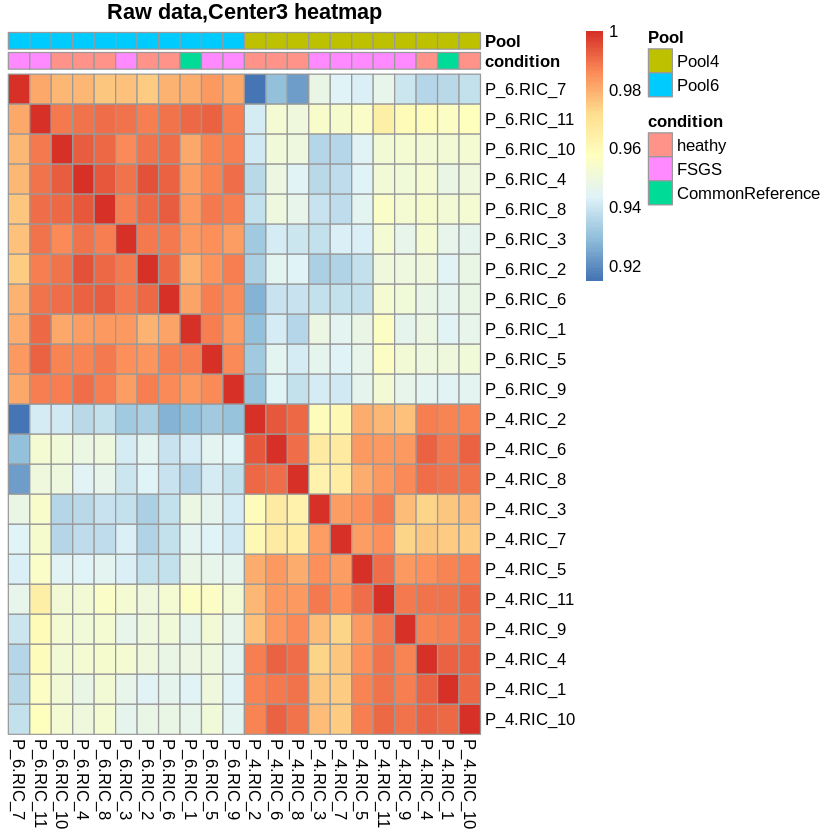

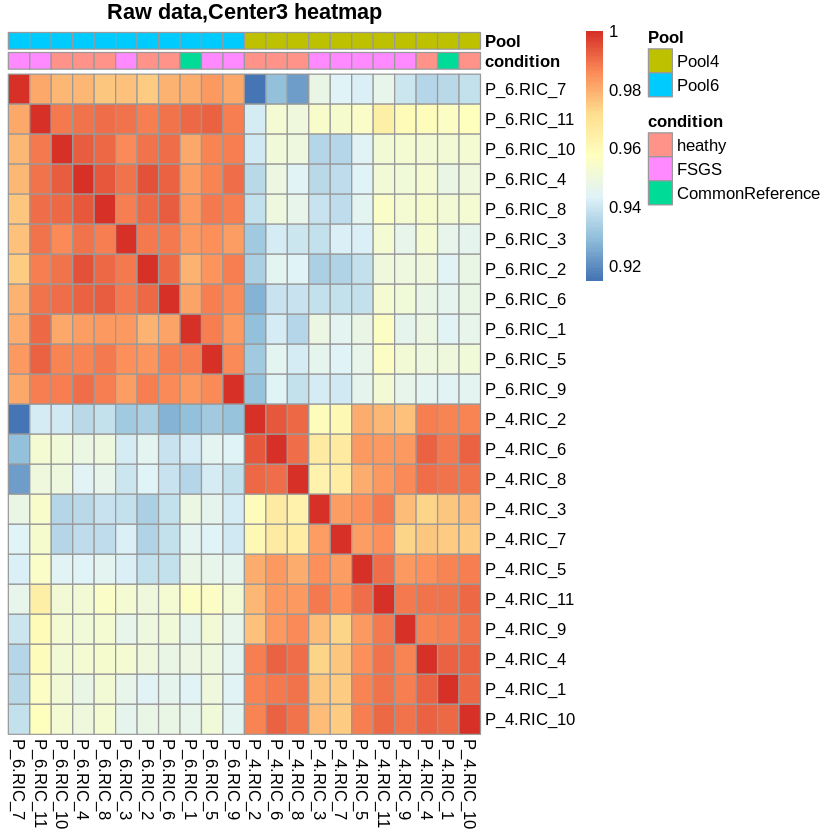

Warning message:
“Removed 525 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 525 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 525 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



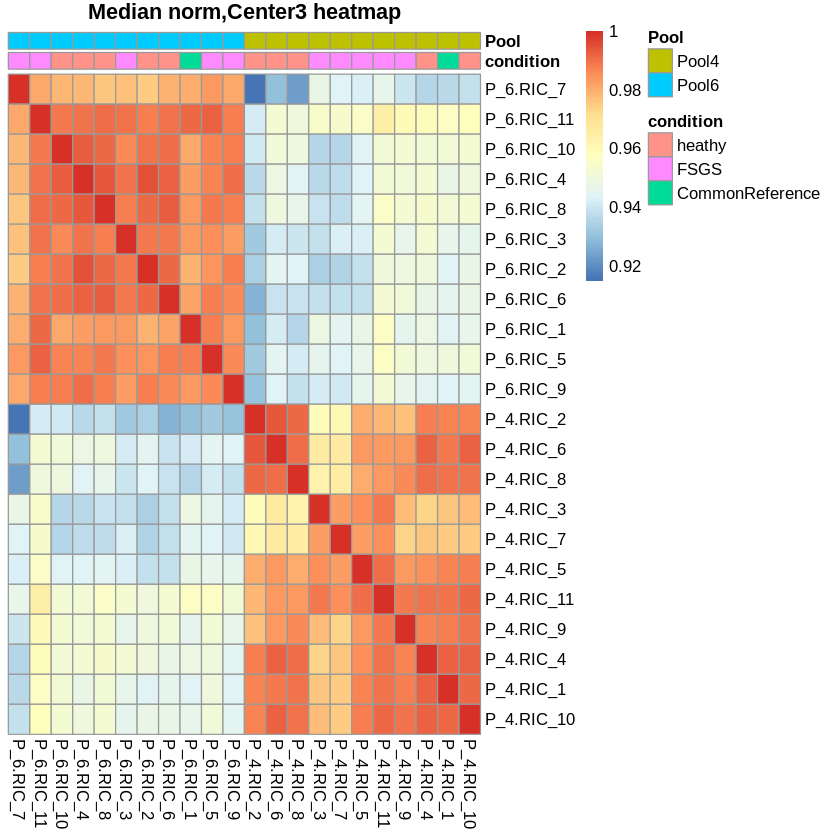

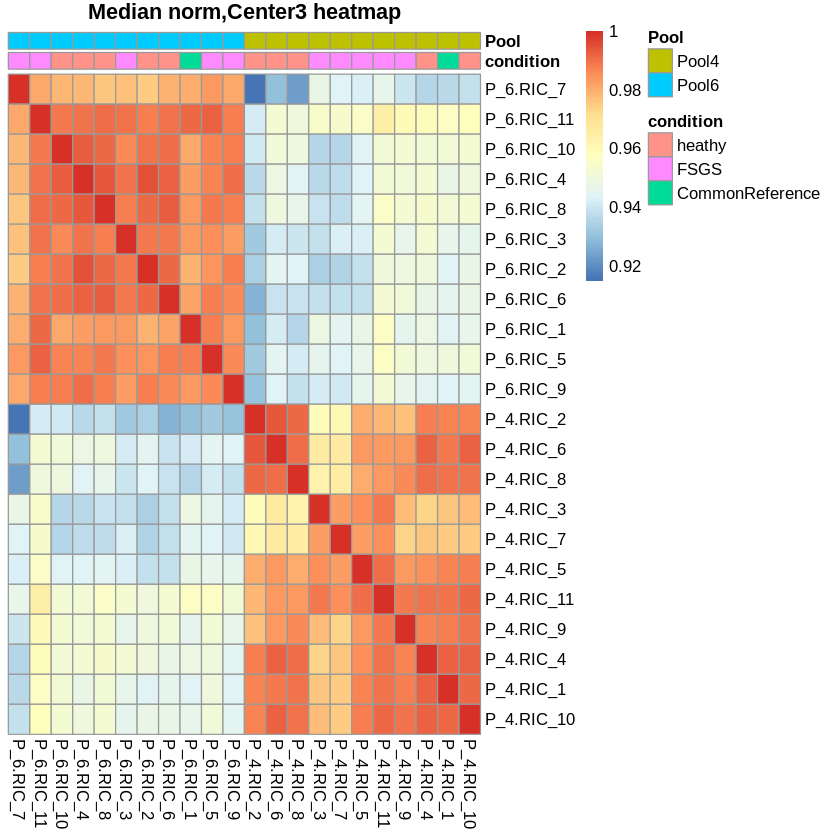

Warning message:
“Removed 570 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 570 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 570 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



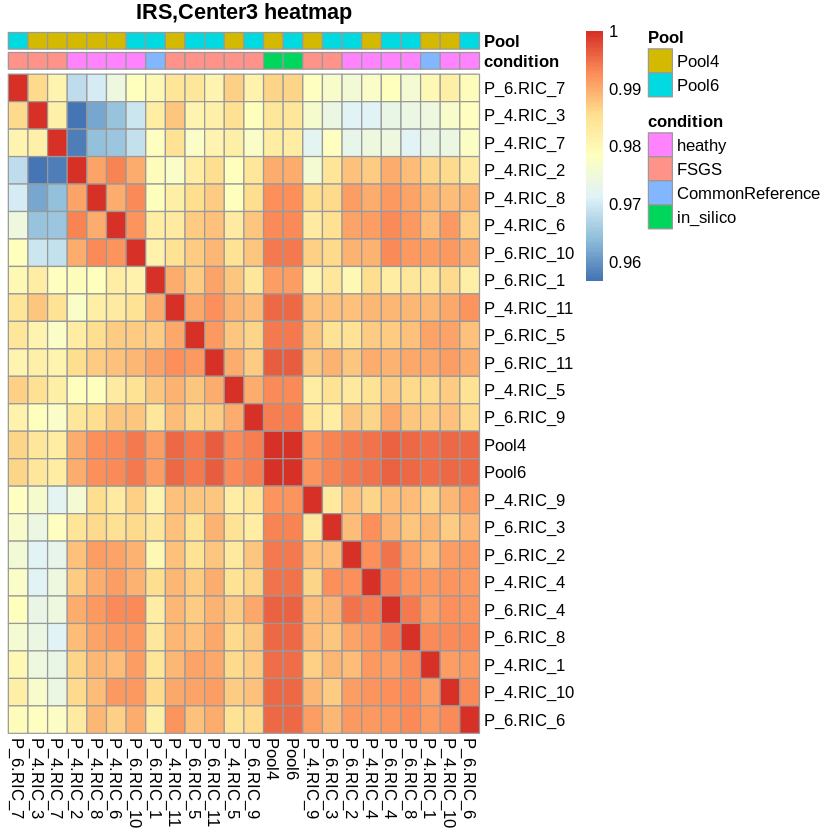

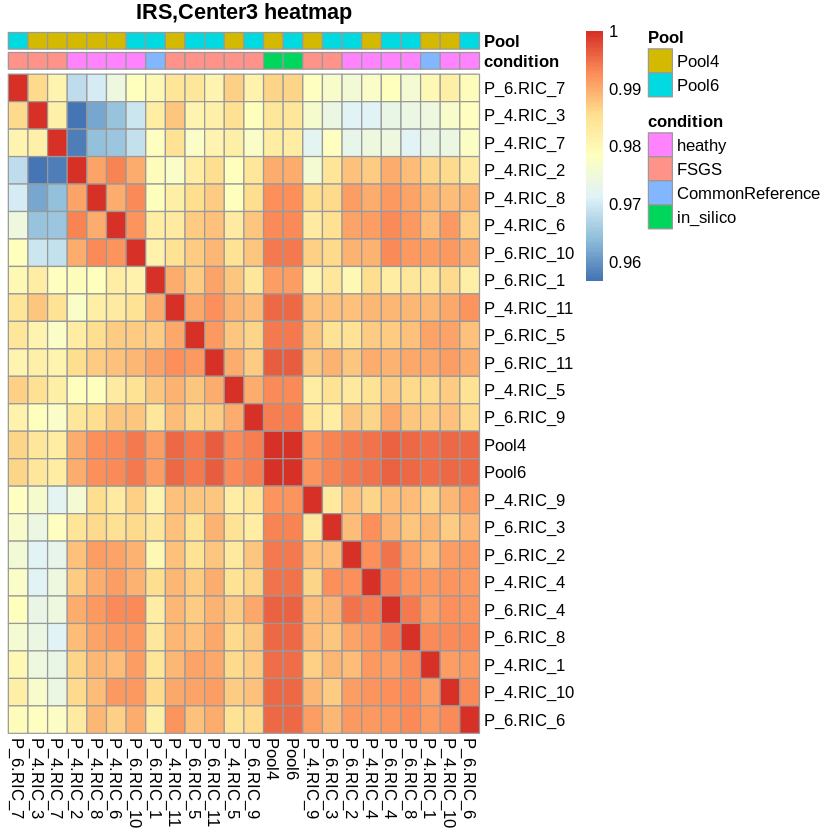

Warning message:
“Removed 477 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 477 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 477 rows containing non-finite values (`stat_summary()`).”


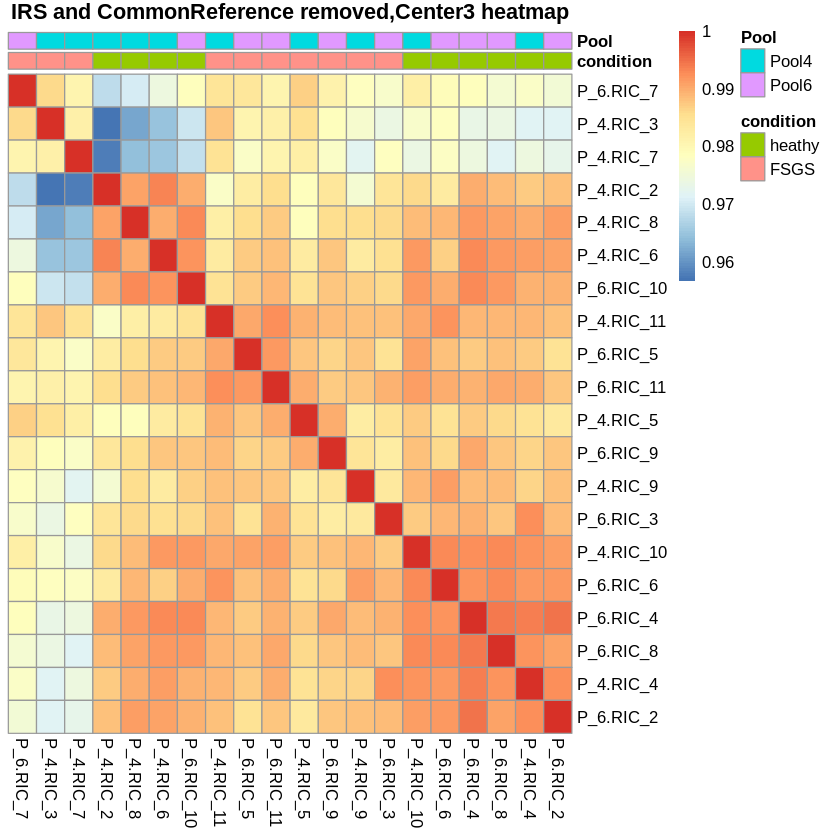

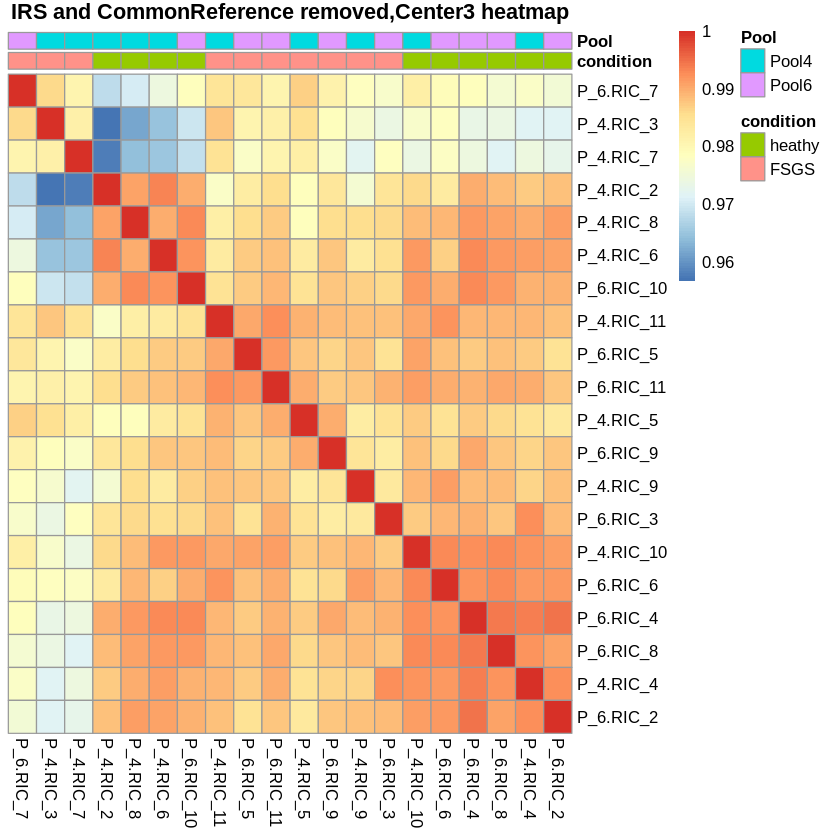

In [8]:
datasets_list = c('01_smaller_lib_balanced_PG_MajorPG')
labs_list = c('Center1', 'Center2', 'Center3')

results_datasets <- list()

for (dataset in datasets_list){
    results_datasets[[dataset]] <- list()
    for (name in labs_list) {
        results_datasets[[dataset]][[name]] <- list()
        data_path <- paste0('/home/yuliya/repos/cosybio/FedProt/data/TMT_data/', dataset, "/", name, "/")
        
        metadata <- read.csv(paste0(data_path, "metadata.tsv"), sep = "\t") %>%
            mutate(Group = ifelse(Group == "Common Reference", "CommonReference", Group)) %>%
            mutate(
                file = Quantitative.column.name,
                lab = as.factor(Center),
                condition = factor(Group, levels = c('heathy', 'FSGS', "CommonReference"))
            )
        rownames(metadata) <- metadata$file
        intensities <- read.csv(paste0(data_path, "pg_intensities.tsv"), row.names=1, sep = "\t")
        intensities <- intensities[, metadata$file]
        cat("Data loaded, for dataset: ", dataset, " and lab: ", name, "\n")
        cat("Data shape: ", dim(intensities), "\n")

        plot_name_prefix = paste0(data_path, name)
        
        # filter na proteins and by condition
        intensities <- filter_na_proteins(intensities, metadata, "file")
        intensities <- filter_by_condition(intensities, metadata, 
            'file', c('heathy', 'FSGS'), 'condition')
        
        # raw_data plot
        create_plots(intensities, metadata, paste0("Raw data,", name), plot_name_prefix,
            shape_col = "Pool")

        intensities <- medianNorm(intensities) %>% as.data.frame()

        # plot median norm
        create_plots(intensities, metadata, paste0("Median norm,", name), paste0(plot_name_prefix, "_median"),
            shape_col = "Pool")

        # irs normalization
        irs_results <- irsNorm_in_silico_single_center(intensities, metadata, 
            pool_col = "Pool",
            column_name = "file",
            center = name,
            aggregation_method = "average")
            
        intensities <- irs_results$corrected_data
        metadata <- irs_results$metadata %>%
            mutate(condition = factor(condition, levels = c('heathy', 'FSGS', "CommonReference", "in_silico")),
                lab = as.factor(lab),
                Pool = as.factor(Pool))

        # irs plot
        create_plots(intensities, metadata, paste0("IRS,", name), paste0(plot_name_prefix, "_median_irs"),
            shape_col = "Pool")

        results_datasets[[dataset]][[name]]$intensities <- intensities
        results_datasets[[dataset]][[name]]$metadata <- metadata

        # remove irs and common reference and plot
        intensities <- intensities[, metadata$condition != "CommonReference" & metadata$condition != "in_silico"]
        metadata <- metadata[metadata$condition != "CommonReference" & metadata$condition != "in_silico",]
        create_plots(intensities, metadata, paste0("IRS and CommonReference removed,", name), 
            paste0(plot_name_prefix, "_median_irs_no_common_ref"),
            shape_col = "Pool")
    }
}

# Combine

Data loaded, for dataset:  01_smaller_lib_balanced_PG_MajorPG 
Metadata shape:  71 9 
Intensities shape:  355 71 


No id variables; using all as measure variables

Warning message:
“Removed 424 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 424 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 424 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Partial NA coefficients for 30 probe(s)”
No id variables; using all as measure variables



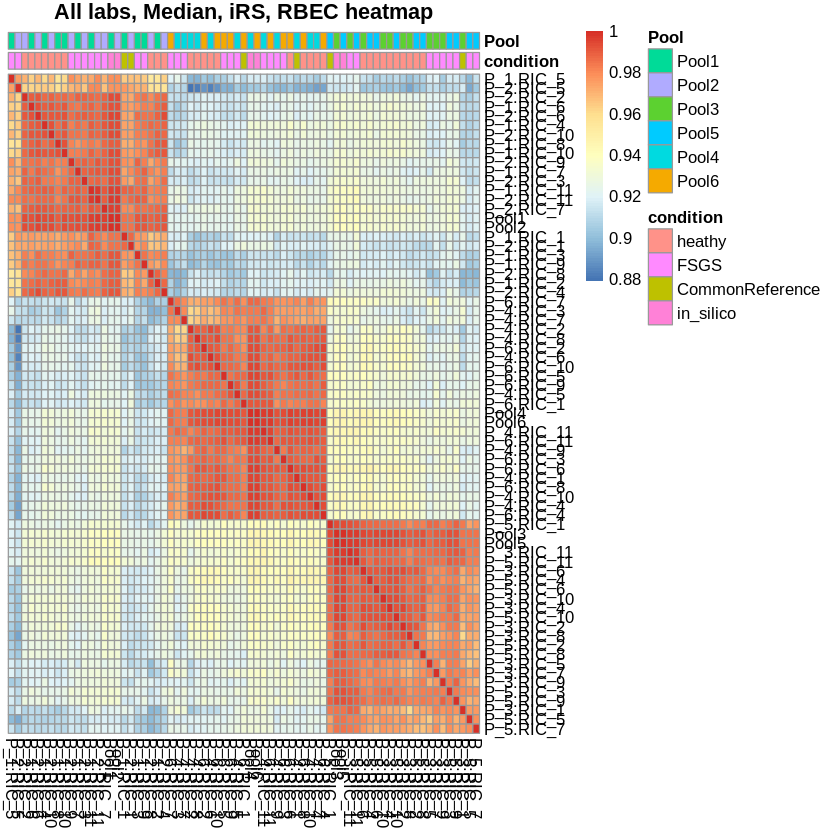

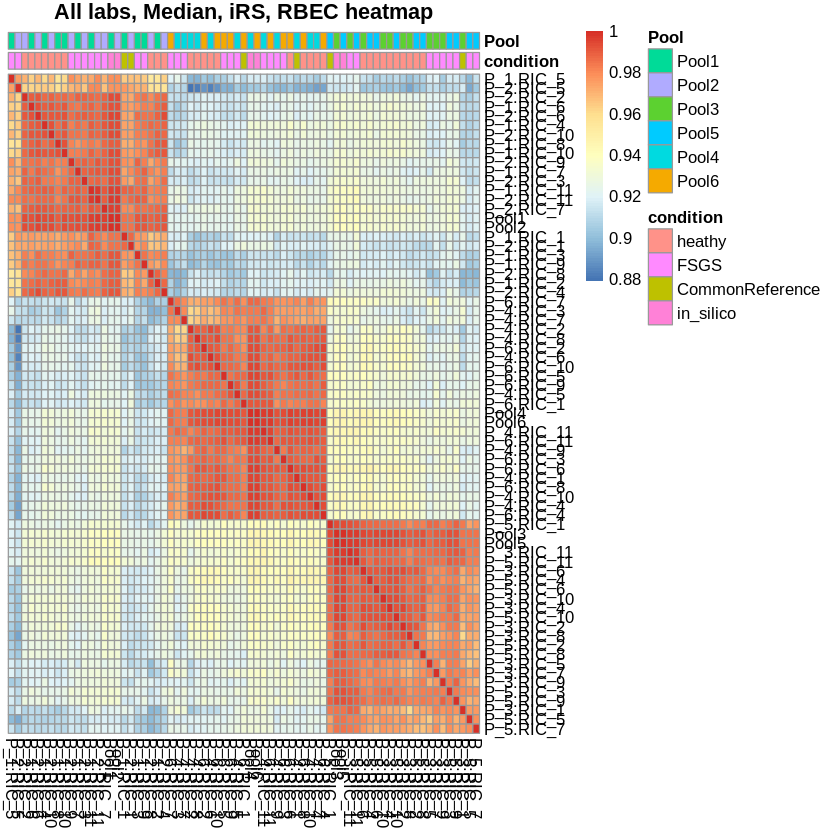

Warning message:
“Removed 424 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 424 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 424 rows containing non-finite values (`stat_summary()`).”
No id variables; using all as measure variables



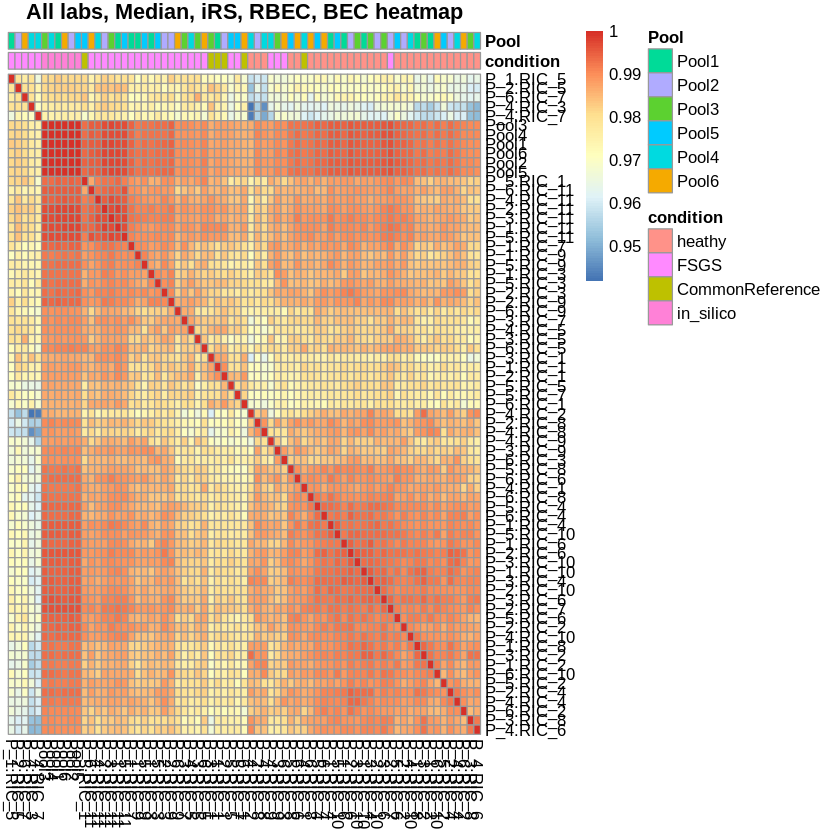

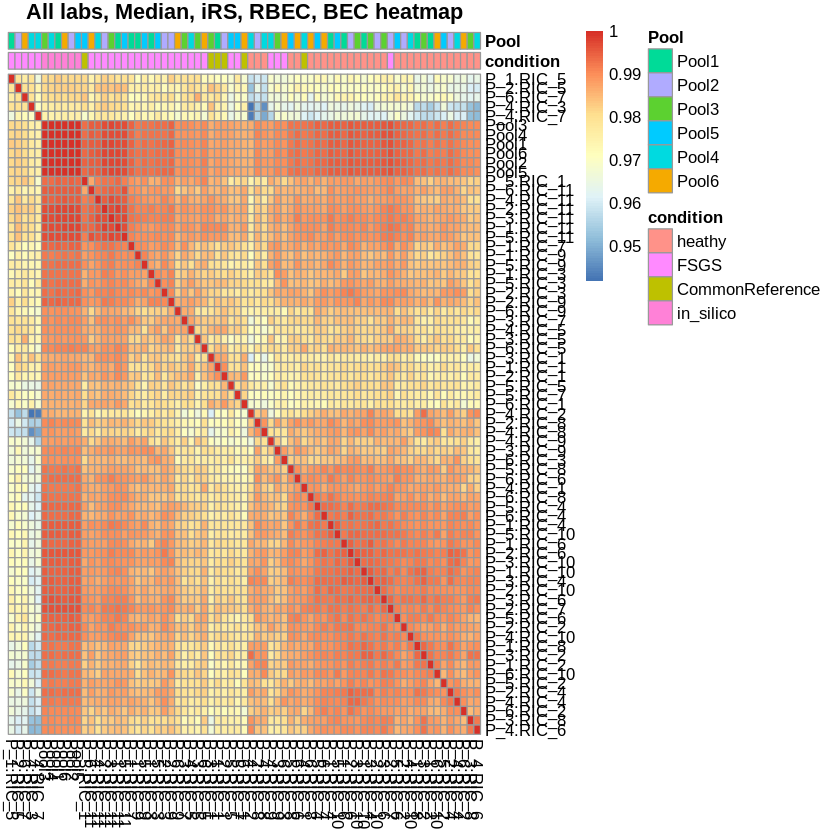

Warning message:
“Removed 355 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 355 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 355 rows containing non-finite values (`stat_summary()`).”


Coefficients not estimable: all_metadata$conditionCommonReference all_metadata$conditionin_silico 


Warning message:
“Partial NA coefficients for 355 probe(s)”
No id variables; using all as measure variables



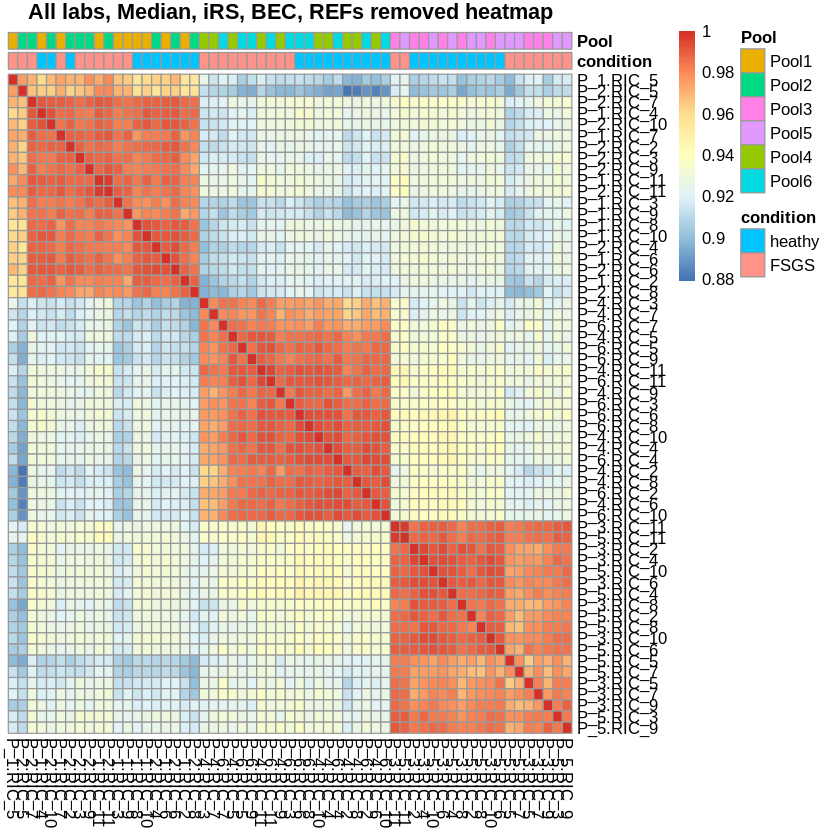

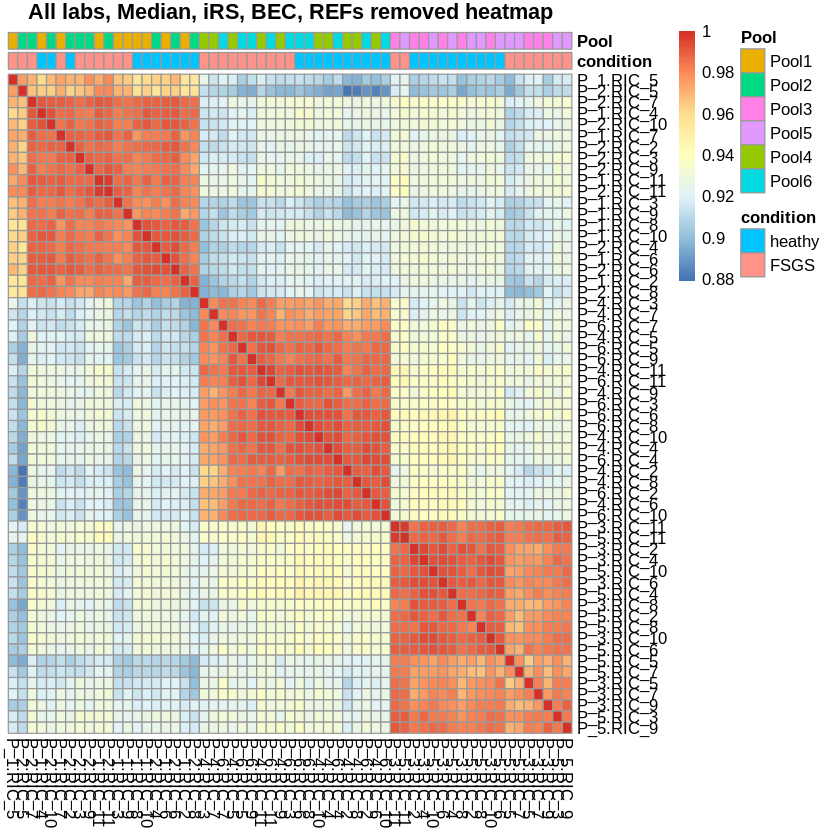

Warning message:
“Removed 355 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 355 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 355 rows containing non-finite values (`stat_summary()`).”


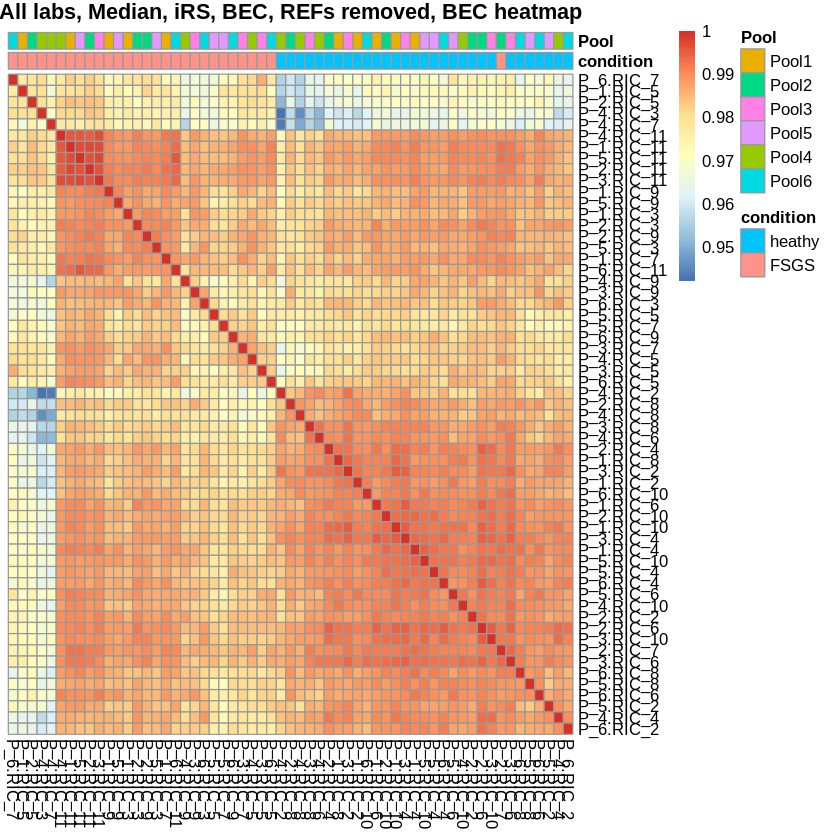

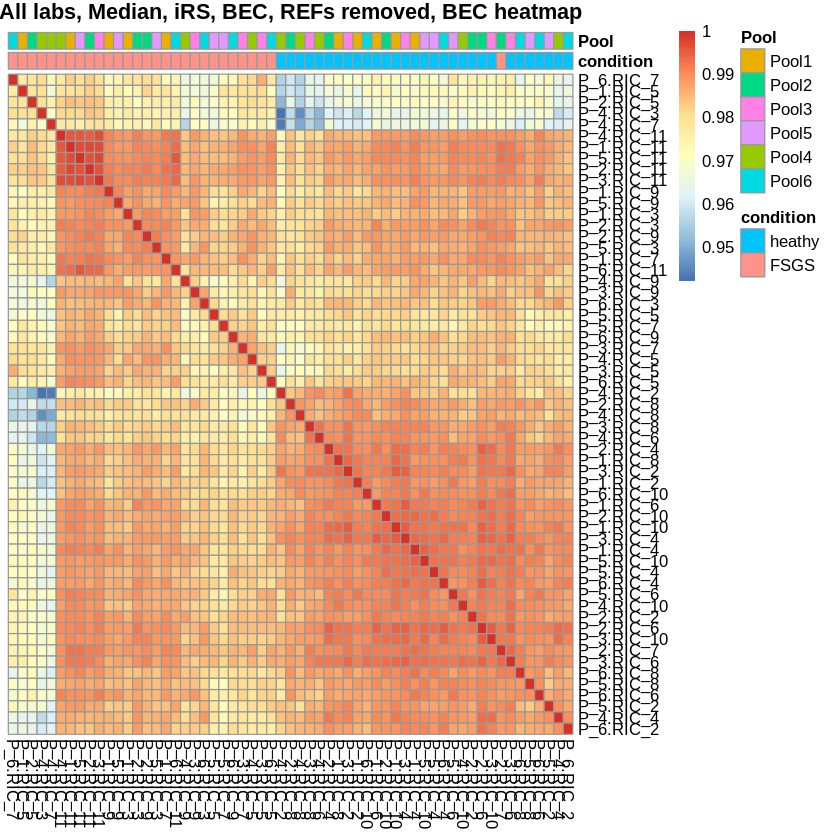

In [22]:
for (dataset in datasets_list){

    all_metadata <- results_datasets[[dataset]][[labs_list[1]]]$metadata %>%
        bind_rows(results_datasets[[dataset]][[labs_list[2]]]$metadata) %>%
        bind_rows(results_datasets[[dataset]][[labs_list[3]]]$metadata)

    dataset1 <- results_datasets[[dataset]][[labs_list[1]]]$intensities
    dataset2 <- results_datasets[[dataset]][[labs_list[2]]]$intensities
    dataset3 <- results_datasets[[dataset]][[labs_list[3]]]$intensities

    # Convert row names to a column
    dataset1 <- dataset1 %>% mutate(RowName = rownames(.))
    dataset2 <- dataset2 %>% mutate(RowName = rownames(.))
    dataset3 <- dataset3 %>% mutate(RowName = rownames(.))

    # Perform inner joins
    all_intensities <- dataset1 %>%
        inner_join(dataset2, by = "RowName") %>%
        inner_join(dataset3, by = "RowName") %>%
        column_to_rownames("RowName")

    cat("Data loaded, for dataset: ", dataset, "\n")
    cat("Metadata shape: ", dim(all_metadata), "\n")
    cat("Intensities shape: ", dim(all_intensities), "\n")

    # batch effects removal for pool

    create_plots(all_intensities, all_metadata, 
        "All labs, Median, iRS, RBEC", 
        paste0("/home/yuliya/repos/cosybio/FedProt/data/TMT_data/01_smaller_lib_balanced_PG_MajorPG/", "all_labs"),
        shape_col = "Pool")

    all_metadata <- all_metadata %>%
        mutate(condition = factor(condition, levels = c('heathy', 'FSGS', "CommonReference", "in_silico")),
            lab = as.factor(lab),
            Pool = as.factor(Pool))

    # BEC
    all_intensities <- log2(all_intensities + 1)
    design <- model.matrix(~all_metadata$condition)
    corrected_data <- limma::removeBatchEffect(all_intensities, batch=all_metadata$Pool, design=design) %>%
        as.data.frame()

    create_plots(corrected_data, all_metadata, 
        "All labs, Median, iRS, RBEC, BEC", 
        paste0("/home/yuliya/repos/cosybio/FedProt/data/TMT_data/01_smaller_lib_balanced_PG_MajorPG/", 
        "all_labs_bec"),
        shape_col = "Pool",
        log_transform = TRUE)

    # remove irs and common reference
    all_intensities <- all_intensities[, all_metadata$condition != "CommonReference" & all_metadata$condition != "in_silico"]
    all_metadata <- all_metadata[all_metadata$condition != "CommonReference" & all_metadata$condition != "in_silico",]

    create_plots(all_intensities, all_metadata, 
        "All labs, Median, iRS, BEC, REFs removed", 
        paste0("/home/yuliya/repos/cosybio/FedProt/data/TMT_data/01_smaller_lib_balanced_PG_MajorPG/", 
        "all_labs_no_ref"),
        shape_col = "Pool",
        log_transform = TRUE)

    # BEC 
    design <- model.matrix(~all_metadata$condition)
    corrected_data <- limma::removeBatchEffect(all_intensities, batch=all_metadata$Pool, design=design) %>%
        as.data.frame()
    
    create_plots(corrected_data, all_metadata,
        "All labs, Median, iRS, BEC, REFs removed, BEC",
        paste0("/home/yuliya/repos/cosybio/FedProt/data/TMT_data/01_smaller_lib_balanced_PG_MajorPG/", 
        "all_labs_no_common_ref_bec"),
        shape_col = "Pool",
        log_transform = TRUE)

    
}